In [1]:
import torch
from torch.distributions import Normal
import torch.optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pylab as plt

In [2]:
""" OU (Ornstein-Uhlenbeck) process

    dX = -A(X-alpha)dt + v dB
    """
class OU:
    def __init__
def variance(t, beta, sigma):
#     assert beta >= 0
#     assert sigma >= 0
    return sigma * sigma * (1.0 - torch.exp( -2.0 * beta * t)) / (2 * beta)

def std(t, beta, sigma):
    return torch.sqrt(variance(t, beta, sigma))

def mean(x0, t, beta, alpha):
#     assert beta >= 0
    return x0 * torch.exp(-1 * beta * t) + (1.0 - torch.exp( -1 * beta * t)) * alpha

def loglik(t, x, alpha, beta, sigma):
    """Calculates log likelihood of a path"""
    
    dt = torch.diff(t)
    mu = mean(x[:, :-1], dt, beta, alpha)
    var = std(dt, beta, sigma)
    return torch.sum(Normal(loc=mu, scale=var).log_prob(x[:, 1:]), axis=1)

def path(x0, t, alpha, beta, sigma):
    """ Simulates a sample path"""

    assert t.shape[1] > 1
    normal = Normal(loc=0., scale=1.)
    x = normal.sample(t.size())
    x[:, 0] = x0
    dt = torch.diff(t)
    scale = std(dt, beta, sigma)
    x[:, 1:] = x[:, 1:] * scale
    for i in range(1, x.shape[1]):
        x[:, i] += mean(x[:, i - 1].reshape(-1, 1), dt[:, i - 1].reshape(-1, 1), beta, alpha).flatten()
    return x

In [46]:
""" OU (Ornstein-Uhlenbeck) process

    dX = -A(X-alpha)dt + v dB
    """
class OU:
    def __init__(self, t0, t1, z0, alpha, beta, sigma, timegrid=False, dN=500):
        self.t0 = t0
        self.t1 = t1
        self.z0 = z0
        self.alpha = alpha
        """
            check whether every element in sigma is positive
        """
        assert all(beta > 0), "beta should be positive"    
        self.beta = beta
        assert all(sigma > 0), "variance should be positive"
        self.sigma = sigma
        assert alpha.shape[0] == beta.shape[0], "parameter dimension must be equal"
        self.D = alpha.shape[0]
        if timegrid == True:
            self.pts = torch.linspace(t0, t1, dN).repeat(D, 1)
        else:
            self.pts = torch.sort(torch.cat([(t1 - t0) * torch.rand(D, dN-2) + t0, torch.tensor([self.t0, self.t1]).repeat(D,1)], axis=1), axis=1)[0]
        self.trj, self.dt = self.path()
          
    def path(self):
        """ Simulates a sample path"""
        alpha = self.alpha
        beta = self.beta
        sigma = self.sigma
        x0 = self.z0
        t = self.pts
        
        def variance(t, beta, sigma):
            assert all(beta >= 0)
            assert all(sigma >= 0)
            return sigma * sigma * (1.0 - torch.exp( -2.0 * beta * t)) / (2 * beta)

        def std(t, beta, sigma):
            return torch.sqrt(variance(t, beta, sigma))

        def mean(x0, t, beta, alpha):
            assert all(beta >= 0)
            return x0 * torch.exp(-1 * beta * t) + (1.0 - torch.exp( -1 * beta * t)) * alpha

        assert t.shape[1] > 1
        normal = Normal(loc=0., scale=1.)
        x = normal.sample(t.size())
        x[:, 0] = x0
        dt = torch.diff(t)
        scale = std(dt, beta, sigma)
        x[:, 1:] = x[:, 1:] * scale
        for i in range(1, x.shape[1]):
            x[:, i] += mean(x[:, i - 1].reshape(-1, 1), dt[:, i - 1].reshape(-1, 1), beta, alpha).flatten()
        return x, dt

In [67]:
def get_gradient(t, x, params):
    
    """Calculates log likelihood of a path"""
    
    def variance(t, beta, sigma):
        assert all(beta >= 0)
        assert all(sigma >= 0)
        return sigma * sigma * (1.0 - torch.exp( -2.0 * beta * t)) / (2 * beta)

    def std(t, beta, sigma):
        return torch.sqrt(variance(t, beta, sigma))

    def mean(x0, t, beta, alpha):
        assert all(beta >= 0)
        return x0 * torch.exp(-1 * beta * t) + (1.0 - torch.exp( -1 * beta * t)) * alpha

    alpha, beta, sigma = params
    

    dt = torch.diff(t)
    mu = mean(x[:, :-1], dt, beta, alpha)
    var = std(dt, beta, sigma)
    return torch.sum(Normal(loc=mu, scale=var).log_prob(x[:, 1:]), axis=1)

    params_ = Variable(params, requires_grad=True)

    LL = loglik(t, x, *params_)
    LL.backward(torch.tensor([1.]).repeat(x.shape[0]))


    return {'alpha':params_.grad[0].clone().detach(), 'beta':params_.grad[1].clone().detach()}

In [68]:
sde = OU(0., 10., 10., *params.data)

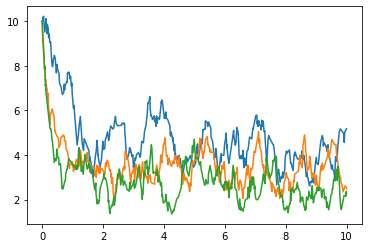

In [69]:
plt.plot(sde.pts.T, sde.trj.T)

In [70]:
get_gradient(sde.pts, sde.trj, params)

tensor([104.2905,  91.3577,  82.5738], grad_fn=<SumBackward1>)

In [3]:
def training_loop(n_epochs, optimizer, params, D):
    for epoch in range(n_epochs):
        if params.grad is not None:
            params.grad.zero_()
        
        x = path(10, t.repeat(D,1), *param)
        NLL = -1 * loglik(t, x.clone().data, a, b, c)
        NLL.backward(torch.tensor([1.0, 1.0]))
        
        with torch.no_grad():
            a -= lr * a.grad
        
        optimizer.zero_grad()
        if epoch % 50 == 0:
            print("alpha = ", a.data, b.data, c.data)

In [21]:
def get_gradient(t, x, params):
    print(params)
    
    params_ = Variable(params, requires_grad=True)
    
    LL = loglik(t, x, *params_)
    LL.backward(torch.tensor([1.]).repeat(x.shape[0]))

    
    return {'alpha':params_.grad[0].clone().detach(), 'beta':params_.grad[1].clone().detach()}

In [22]:
get_gradient(T, obs, params.data)

tensor([[[4.4875],
         [3.5079],
         [2.9145]],

        [[2.3049],
         [3.5579],
         [4.1904]],

        [[2.0000],
         [2.0000],
         [2.0000]]])


{'alpha': tensor([[-41.3663],
         [-74.0421],
         [-31.9221]]),
 'beta': tensor([[-55.9939],
         [-65.2083],
         [-23.5984]])}

In [ ]:
params.data

In [7]:
D = 3

In [8]:
a = torch.randn((D,1)) + 4.
b = torch.randn((D,1)) + 3.
c = torch.ones((D,1)) + 1.

In [6]:
T = torch.linspace(0,10,2000)

In [9]:
params = Variable(torch.stack([a,b,c]), requires_grad=True)

In [11]:
optimizer = torch.optim.Adam([params], lr = 0.05)
obs = path(10, T.repeat(D, 1), *torch.ones((3,D,1)))

In [ ]:
plt.plot(T.repeat(D,1).T, obs.T)

In [ ]:
def training_loop(n_epochs, t, obs, optimizer, params):
    for epoch in range(n_epochs):
        NLL = -1 * loglik(t, obs, *params)
        NLL.backward(torch.tensor([1.]).repeat(D))
        
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 500 == 0:
            print("alpha = ", *params)
    
    return params.data

In [ ]:
training_loop(5000, T, obs, optimizer, params)

In [ ]:
from torch.autograd import Variable
import torch
x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = x ** 2
loss = z

# do backward for first element of z
z.backward(torch.FloatTensor([[1, 0, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() #remove gradient in x.grad, or it will be accumulated

# do backward for second element of z
z.backward(torch.FloatTensor([[0, 1, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# do backward for all elements of z, with weight equal to the derivative of
# loss w.r.t z_1, z_2, z_3 and z_4
z.backward(torch.FloatTensor([[1, 1, 1, 1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# or we can directly backprop using loss
# loss.backward() # equivalent to loss.backward(torch.FloatTensor([1.0]))
# print(x.grad.data)    

In [ ]:
loss

In [ ]:
NLL = -loglik(t,x, *params)
NLL.backward()
params.grad

In [ ]:
with torch.no_grad():
    params -= 0.0001 * params.grad

In [ ]:
params

In [ ]:
loc = torch.tensor(-10.0, requires_grad = True)
lr = 0.005
for i in range(3100):
    if loc.grad is not None:
        loc.grad.zero_()
    to_learn = dist.Normal(loc=loc, scale=1.0)
    loss = -torch.sum(to_learn.log_prob(uv.sample(torch.tensor([100]))))
    loss.backward()
    
    with torch.no_grad():
        loc -= lr * loc.grad

In [ ]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
t1 = 1.
t0 = 0.
dN = 30
D = 1

In [ ]:
t = torch.sort(torch.cat([(t1 - t0) * torch.rand(D, dN-2) + t0, torch.tensor([t0, t1]).repeat(D,1)], axis=1), axis=1)[0]

In [ ]:
torch.diff(t)

In [ ]:
import numpy as np
import matplotlib.pylab as plt


t = np.linspace(0,1,500)
x = path(5, t, 10, 0, 1)
plt.plot(t, x)

loglik(t, x, 10,0,1)

In [ ]:
import numpy as np
import jax.numpy as jnp
from scipy.optimize import minimize
from jax.scipy import optimize 
import jax

In [ ]:
def neg_loglike(theta):
    beta = theat[0]
    sigma = jnp.exp(theta[-1])
    mu = jnp.dot(x, beta)
    ll = jax.numpy.sum(jax.scipy.stats.norm.logpdf(y, loc = mu, scale=sigma))
    return (-1 * ll) / N